# Importar dados

In [1]:
import pandas as pd
train_data = pd.read_csv(r'../data/train.csv')
test_data = pd.read_csv(r'../data/test.csv')

In [2]:
train_data.shape

(112, 4)

# Analisar Dados

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         112 non-null    int64
 1   age        112 non-null    int64
 2   sex        112 non-null    int64
 3   education  112 non-null    int64
dtypes: int64(4)
memory usage: 3.6 KB


In [4]:
train_data.describe()

,id,age,sex,education
count,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714
std,32.475632,22.642156,0.501927,4.909870
min,1.000000,13.000000,0.000000,0.000000
25%,28.750000,20.000000,0.000000,4.000000
50%,56.500000,51.500000,0.000000,9.000000
75%,84.250000,65.250000,1.000000,12.000000
max,112.000000,79.000000,1.000000,20.000000


In [5]:
#fig = plt.figure(figsize = (20,5))
#ax = fig.gca()
#train_data['education'].hist(ax = ax)
train_data.head()

,id,age,sex,education
0,1,13,1,7
1,2,14,0,8
2,3,15,1,9
3,4,15,1,9
4,5,15,1,9


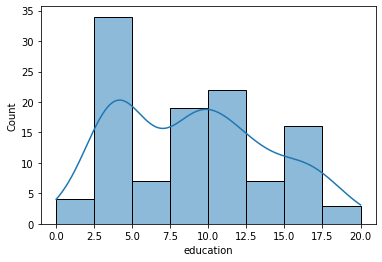

In [6]:
#train_data.isna().any()

import seaborn as sns
#sns.histplot(train_data['age'], kde='True')
#sns.histplot(train_data['sex'], kde='True')
sns.histplot(train_data['education'], kde='True')

#sns.boxplot(x=train_data['age'])
#sns.boxplot(x=train_data['sex'])
#sns.boxplot(x=train_data['education'])

import matplotlib.pyplot as plt
#corr_matrix = train_data.corr()
#f, ax = plt.subplots(figsize=(8,6))
#sns.heatmap(corr_matrix, vmin=1, vmax=1, square=True, annot=True)

# Visualisar os dados

In [7]:
import numpy as np
import scipy.io

mat = scipy.io.loadmat('../data/train_data.mat')

X = mat["train_data"]
print(X)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.02631835 0.01242944 0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.01770987 0.         0.        ]]

 [[0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  [0.         0.      

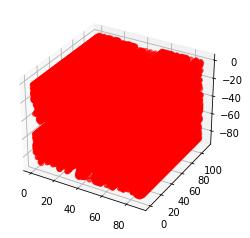

In [8]:
#todos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z,x,y = X.nonzero()
            
ax.scatter(x, y, -z, zdir='z', c= 'red')
plt.show()

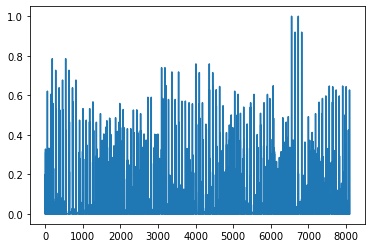

In [9]:
#Exemplo 1 pessoa
store = []
for i in range(90):
    for j in range (90):
        store.append(X[i][j][15])
        #print(X[i][j][0])
        
plt.plot(store)

# Importar matrizes de conectividade

In [10]:
def get_data_from_mat(train_file,test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 
    print(train_mat.keys())
    print(test_mat.keys())
    train_np = np.array(train_mat['train_data']).transpose(2,0,1)
    test_np = np.array(test_mat['test_data']).transpose(2,0,1)
    print(train_np.shape)
    print(test_np.shape)
    return  train_np, test_np


train_mat, test_mat = get_data_from_mat('../data/train_data.mat','../data/test_data.mat')

dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
(112, 90, 90)
(28, 90, 90)


# Treinar o modelo 1 - Utilizar os dados das matrizes e apenas as labels do csv


In [12]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7116990489118397602
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4160159744
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2193183136022835618
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [13]:
#para melhor gestão memória GPU por parte do tensorflow

def set_keras_backend(backend):
    print("A acertar o backend e libertar memória da grafica")
    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        importlib.reload(K)
        assert K.backend() == backend
    if backend == "tensorflow":
        # Allow memory growth for the GPU
        physical_devices = tf.config.experimental.list_physical_devices('GPU')
        print(physical_devices)
        tf.config.experimental.set_memory_growth(physical_devices[0], True)  
  
  
set_keras_backend("tensorflow")

A acertar o backend e libertar memória da grafica
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [14]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten, Dense, Embedding, BatchNormalization,Activation,Dropout, Input, concatenate, LSTM, SimpleRNN
from livelossplot.inputs.tf_keras import PlotLossesCallback
from tensorflow.keras.initializers import RandomNormal, Constant

y_train = train_data['age']
x_train = train_mat
x_train2 = train_data.drop(['age','id'],axis=1)



inputs = Input(shape=(90,90))

conv1 = Conv1D(64, 3)(inputs)
act1 = Activation('relu') (conv1)
norm1 = BatchNormalization(momentum=0.95)(act1)
pool1 = MaxPooling1D(2) (norm1)

conv2 = Conv1D(64, 3)(pool1)
act2 = Activation('relu') (conv2)
norm2 = BatchNormalization(momentum=0.95)(act2)
pool2 = MaxPooling1D(2) (norm2)

conv3 = Conv1D(64, 3)(pool2)
act3 = Activation('relu') (conv3)
norm3 = BatchNormalization(momentum=0.95)(act3)


lstm = LSTM(32, return_sequences=True) (norm3)


inputs2 = Input(shape = (2))

flat2 = Flatten()(inputs2)


flat = Flatten()(lstm)

concat = concatenate([flat, flat2])

dense1 = Dense(256, activation='relu')(concat)
dense2 = Dense(256, activation='relu') (dense1)
dense3 = Dense(100, activation='relu') (dense2)
output = Dense(1, activation='relu') (dense3)


In [14]:
def fit_model(X_train, X_train2, Y_train, X_test, X_test2, Y_test):
    # define model
    model = Model([inputs,inputs2], output)

    model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_error')
    # fit model
    history = model.fit([X_train,X_train2], Y_train, epochs=200, batch_size=16, validation_data=([X_test,X_test2],Y_test), callbacks=[PlotLossesCallback()])
    return model

In [15]:
from sklearn.model_selection import train_test_split, LeaveOneOut

                    # indice do excel -1, idade
validation_indices = [0,   #13
                      4,   #15
                      23,  #18
                      21,  #21
                      19,  #24
                      24,  #26
                      34,  #31
                      29,  #33
                      20,  #37
                      44,  #41
                      30,  #46
                      80,  #51
                      109, #55
                      66,  #57
                      78,  #59
                      89,  #64
                      108, #67
                      70,  #69
                      98,  #74
                      107, #77
                      87,  #79
                      72,  #72
                     ]

                      # indice do excel -1, idade
ensemble_indices = [1,   #14
                    50, #20
                    51, #25
                    43, #40
                    48, #42
                    101, #51
                    103, #58
                    104, #63
                    111, #69
                    106, #74
                    105, #76
                      
                     ]

def getAllIndicesNotInLists(array, list, list2):
    l = len(array)
    j = 0
    result= []
    for i in range(l):
        if(i not in list and i not in list2):
            result.append(i)
    return result

def getRowsWithIndices(dataset,indices):
    return dataset.filter(items = indices, axis=0)


usar_dados_custom = True

if usar_dados_custom:
    
    X_train = x_train[getAllIndicesNotInLists(x_train, validation_indices, ensemble_indices)]  
    X_test = x_train[validation_indices]
    X_train_ensemble = x_train[ensemble_indices]
    
    X_train2 = getRowsWithIndices(x_train2,getAllIndicesNotInLists(x_train2, validation_indices, ensemble_indices))
    X_test2 = getRowsWithIndices(x_train2,validation_indices)
    X_train2_ensemble = getRowsWithIndices(x_train2,ensemble_indices)
    
    Y_train = getRowsWithIndices(y_train,getAllIndicesNotInLists(y_train, validation_indices, ensemble_indices))
    Y_test = getRowsWithIndices(y_train,validation_indices)
    Y_train_ensemble = getRowsWithIndices(y_train, ensemble_indices)
            
else:
    X_train, X_test, X_train2, X_test2, Y_train, Y_test  = train_test_split(x_train,x_train2,y_train, test_size=0.2, random_state=25)


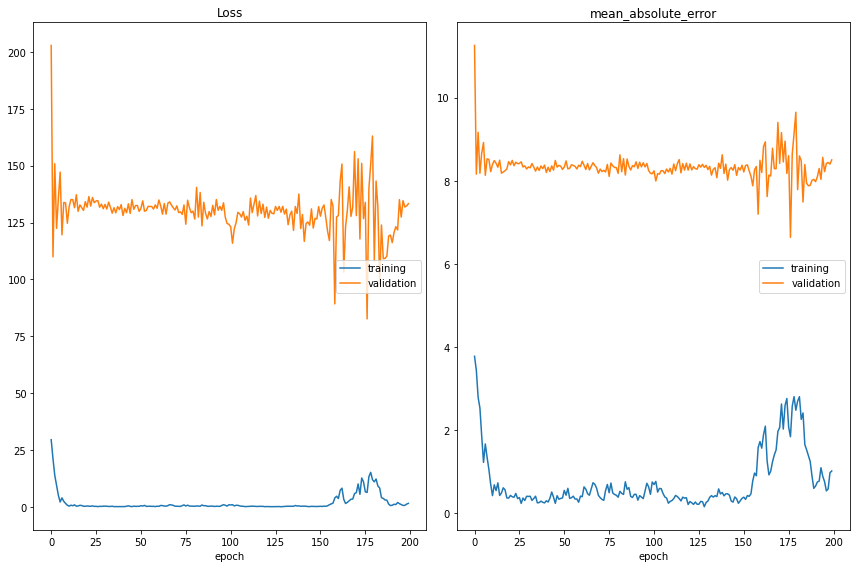

Loss
	training         	 (min:    0.038, max:   29.514, cur:    1.513)
	validation       	 (min:   82.630, max:  202.849, cur:  133.283)
mean_absolute_error
	training         	 (min:    0.154, max:    3.775, cur:    1.015)
	validation       	 (min:    6.639, max:   11.256, cur:    8.501)
>Saved models/model_5.h5


In [16]:
from pathlib import Path
from tensorflow.keras import backend as K
Path("/models").mkdir(parents=True, exist_ok=True)

# fit and save models
n_members = 5
for i in range(n_members):
    # fit model
    set_keras_backend("tensorflow")
    model = fit_model(X_train, X_train2, Y_train, X_test, X_test2, Y_test)
    # save model
    filename = 'models/model_' + str(i + 1) + '.h5'
    model.save(filename)
    del model
    K.clear_session()
    print('>Saved %s' % filename)

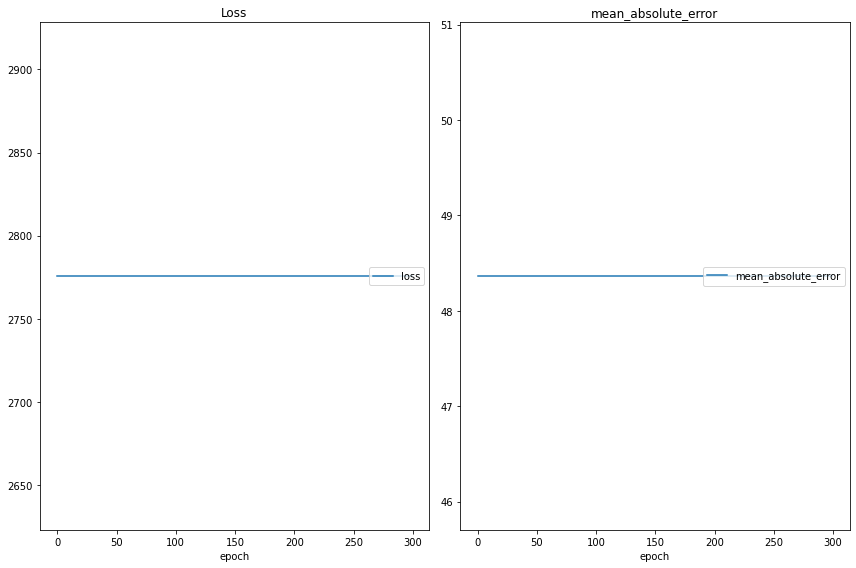

Loss
	loss             	 (min: 2775.636, max: 2775.636, cur: 2775.636)
mean_absolute_error
	mean_absolute_error 	 (min:   48.364, max:   48.364, cur:   48.364)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

# load models from file
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = 'models/model_' + str(i + 1) + '.h5'
        # load model from file
        model = load_model(filename)
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models
 
# define stacked model from multiple member input models
def define_stacked_model(members):
    # update all layers in all models to not be trainable
    for i in range(len(members)):
        model = members[i]
        for layer in model.layers:
            # make not trainable
            layer.trainable = False
            # rename to avoid 'unique layer name' issue
            layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
    # define multi-headed input
    ensemble_visible = [model.input for model in members]
    # concatenate merge output from each model
    ensemble_outputs = [model.output for model in members]
    merge = concatenate(ensemble_outputs)
    hidden = Dense(256, activation='relu')(merge)
    hidden = Dense(256, activation='relu')(merge)
    hidden = Dense(100, activation='relu')(merge)
    output = Dense(1, activation='relu')(hidden)
    model = Model(inputs=ensemble_visible, outputs=output)
    # plot graph of ensemble
    plot_model(model, show_shapes=True, to_file='model_graph.png')
    # compile
    model.compile( loss='mean_squared_error', optimizer='adam', metrics='mean_absolute_error')
    return model
 
# fit a stacked model
def fit_stacked_model(model, inputX, inputX2, inputy):
    # prepare input data
    X = [None] * len(model.input)
    for i in range (len(model.input)):
        X[i] = [inputX,inputX2]
    # encode output data
    inputy_enc = inputy
    # fit model
    model.fit(X, inputy_enc, epochs=300, verbose=0, callbacks=[PlotLossesCallback()])
 
# make a prediction with a stacked model
def predict_stacked_model(model, inputX, inputX2):
    # prepare input data
    X = [None] * len(model.input)
    for i in range (len(model.input)):
        X[i] = [inputX,inputX2]
    # make prediction
    return model.predict(X, verbose=0)

# load all models
n_members = 5
members = load_all_models(n_members)
print('Loaded %d models' % len(members))
# define ensemble model
stacked_model = define_stacked_model(members)
# fit stacked model on test dataset
fit_stacked_model(stacked_model, X_train_ensemble, X_train2_ensemble, Y_train_ensemble)
# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, test_mat, test_data.drop(['id'],axis=1))
print(yhat)

# Prepare submission

In [ ]:
with open("submissao.csv", "w") as sub:
    # Writing data to a file
    sub.write('id,age\n')
    for i in test_data['id']:
        sub.write(str(i)+','+str(float(yhat[i-1]))+'\n')
    